In [1]:
from data.dataset import Dataset, DatasetNames

dataset = Dataset()

dataset_name = DatasetNames.ARITHMETIC

dataset_path = dataset.generate(dataset_name)

train_data, val_data, vocabulary_size = dataset.get(dataset_name)

In [6]:
import torch
from models.gpt.gpt_model import GPT
from training.train_model import train_model

n_embeddings = 576
n_heads = 9
n_layers = 9
max_iterations = 10000
iterations_interval = 100
eval_iterations = 200
batch_size = 128
learning_rate = 3e-4
context_length = 10
dropout = 0.2

device = "cuda" if torch.cuda.is_available() else "cpu"

gpt_model = GPT(vocabulary_size, n_embeddings, n_heads, context_length, n_layers, dropout).to(device)

train_losses, val_losses, steps = train_model(gpt_model, max_iterations, iterations_interval, eval_iterations, batch_size, learning_rate, context_length, train_data, val_data, device)

step 0: train loss 3.0267, val loss 3.0278
step 100: train loss 1.9814, val loss 1.9833
step 200: train loss 1.8587, val loss 1.8578
step 300: train loss 1.8338, val loss 1.8351
step 400: train loss 1.8290, val loss 1.8258
step 500: train loss 1.8202, val loss 1.8192
step 600: train loss 1.8135, val loss 1.8141
step 700: train loss 1.8041, val loss 1.8038
step 800: train loss 1.7983, val loss 1.7978
step 900: train loss 1.7928, val loss 1.7906
step 1000: train loss 1.7865, val loss 1.7849
step 1100: train loss 1.7798, val loss 1.7761
step 1200: train loss 1.7756, val loss 1.7775
step 1300: train loss 1.7696, val loss 1.7721
step 1400: train loss 1.7633, val loss 1.7608
step 1500: train loss 1.7501, val loss 1.7517
step 1600: train loss 1.7496, val loss 1.7480
step 1700: train loss 1.7438, val loss 1.7457
step 1800: train loss 1.7368, val loss 1.7402
step 1900: train loss 1.7300, val loss 1.7326
step 2000: train loss 1.7387, val loss 1.7394
step 2100: train loss 1.7270, val loss 1.7261


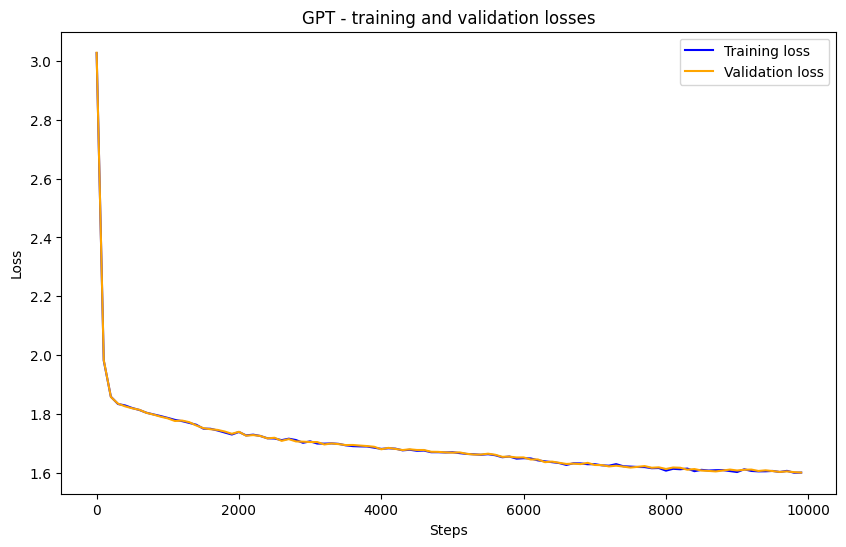

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training loss', color='blue')
plt.plot(steps, val_losses, label='Validation loss', color='orange')
plt.title('GPT - training and validation losses')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
from data.tokenizer import decode, get_decoding, get_vocabulary

idx = torch.zeros((1, 1), dtype=torch.long, device=device)

generated = gpt_model.generate(idx, max_new_tokens=1000)[0].tolist()

p = dataset.paths[DatasetNames.ARITHMETIC]

with open(p) as file:
    text = file.read()

decoding = get_decoding(get_vocabulary(text))
print(decode(generated, decoding))

'\n38+3\n2.0\n5=840\n9-3=1\n10\n464/344\n3-3=42-8\n451/5\n6373\n3=18=4=2\n1=5-2.0=3=2*628\n5=1004\n8=1+37370/8*873=710\n125*33=19.00\n5=48+4=1=762\n37+79-6.0/77-728=800\n7/210=5170+8*769-116\n87=20\n7=7=1+9.0\n926*513487=4+0=2*8\n118\n362.0/37*9\n46160\n2/55+4\n81-313.0\n197\n7=1=720=355+212225/7.0.0\n7\n50\n9218/68\n2=153.0+617\n171/7=1*4=8=152/3/6115-10\n529=1=-7\n2355-7\n7\n1\n7\n3=357\n30.0/7=16\n4.0\n9+7=4+2614\n6512=13/6.0/5*52=1=17\n3*47250\n2\n795=1-33*7+2=9=10/6691=208=-9=38\n318/1+8-9=52=6=-1=-1=18/7908=194=652\n73539=-4=9+70=-97\n19\n3*2+9\n1.0=10*2+1813-35775=10\n6910\n3=3=7=256\n1260=1=18/73+6/2.0/189\n3=6447=1=16512\n18\n6=34=95/25\n36.0=1=13=7=1218=-1=18\n7\n6664/8=1=23=5=-7\n19.0\n574\n17*33915=596\n12=1=12*42.0\n538=130+7.0\n9\n470\n1236=15=1390=5\n90=410=7\n8*7+85860\n10/962=737.0+7\n85=223.0=54.0\n292=34124269=31\n7+2\n7=491=72=-8149\n97\n2+48/98=839421-70=6-92=9160/8\n61*8-2+5=18.00/9\n653+2=55.088=218=327\n88/8728=4*4+68\n4=3\n4*6=1\n90=1+1=7/1\n11/33\n60-2=2+9-9-4